In [1]:
import numpy as np
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

import urllib
import os
import csv
import cv2
import time
from PIL import Image

# from keras_retinanet import models/
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()


RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


In [2]:
THRES_SCORE = 0.4

def draw_detections(image, box, scores=0, label=''):
#   for box, score, label in zip(boxes[0], scores[0], labels[0]):
#     if score < THRES_SCORE:
#         continue

#     color = label_color(labels)

#     box = box.astype(int)
    
    draw_box(image, box, color=(0,255,0) )

    caption = "{} {:.3f}".format(label, 0)
    draw_caption(image, box, caption)

In [3]:

def show_detected_objects(image_row,img_folder=''):
    
    img_path = img_folder+image_row.image_name
    true_box = [
        image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max]
    image = read_image_bgr(img_path)

    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    image = preprocess_image(image)
    image, scale = resize_image(image)

#     boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis = 0))
#     print('scale',scale)
#     print('scores',scores)
#     print('labels',labels)
#     print('image',image)

#     boxes /= scale
#     print('boxes',boxes[0])

    draw_box(draw, true_box, color=(255, 0, 0))
    draw_detections(image, box=true_box, label= labels_to_name)
    
#     caption = "{} {:.3f}".format(image_row.class_name,0)
#     draw_caption(image,true_box , image_row.class_name)

    plt.axis('off')
    plt.imshow(draw)
    plt.show()

In [4]:
train = pd.read_csv('train/_annotations.csv')
val  = pd.read_csv('valid/_annotations.csv')
test  = pd.read_csv('test/_annotations.csv')

In [5]:
train

filename  width  height  \
0     00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg    640     640   
1     00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg    640     640   
2     00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg    640     640   
3     00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg    640     640   
4     00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg    640     640   
...                                                 ...    ...     ...   
3878  00008_png.rf.fd4a12657377d42c46ae2a91ab9b770c.jpg    640     640   
3879  00008_png.rf.fd4a12657377d42c46ae2a91ab9b770c.jpg    640     640   
3880  00008_png.rf.fd4a12657377d42c46ae2a91ab9b770c.jpg    640     640   
3881  00008_png.rf.fd4a12657377d42c46ae2a91ab9b770c.jpg    640     640   
3882  00008_png.rf.fd4a12657377d42c46ae2a91ab9b770c.jpg    640     640   

       class  xmin  ymin  xmax  ymax  
0     Select    95    98   345   157  
1     Select   102   244   342   309  
2     Button   106   542   372   614  
3      Image    12   160   139   400  
4      Image   191   151   306   395  
...      ...   ...   ...   ...   ...  
3878   Label   241   403   360   434  
3879   Label   401   411   526   439  
3880   Label    69   448   210   480  
3881   Label   238   445   377   476  
3882   Label   402   446   519   476  

[3883 rows x 8 columns]

In [6]:
val

filename  width  height  \
0    image_117_png.rf.26c32f75a554a987d319c2d8e3ce0...    640     640   
1    image_117_png.rf.26c32f75a554a987d319c2d8e3ce0...    640     640   
2    image_117_png.rf.26c32f75a554a987d319c2d8e3ce0...    640     640   
3    image_117_png.rf.26c32f75a554a987d319c2d8e3ce0...    640     640   
4    image_117_png.rf.26c32f75a554a987d319c2d8e3ce0...    640     640   
..                                                 ...    ...     ...   
536  00018_png.rf.ca1c46d1806bcfdb955d0ec2f5ebc93a.jpg    640     640   
537  00018_png.rf.ca1c46d1806bcfdb955d0ec2f5ebc93a.jpg    640     640   
538  00018_png.rf.ca1c46d1806bcfdb955d0ec2f5ebc93a.jpg    640     640   
539  00018_png.rf.ca1c46d1806bcfdb955d0ec2f5ebc93a.jpg    640     640   
540  00018_png.rf.ca1c46d1806bcfdb955d0ec2f5ebc93a.jpg    640     640   

         class  xmin  ymin  xmax  ymax  
0    Paragraph    63    69   254   149  
1    Paragraph    58   201   247   264  
2    Paragraph   365    43   558   108  
3    Paragraph   356   170   582   231  
4    Paragraph    75   303   262   365  
..         ...   ...   ...   ...   ...  
536  Check Box   403   351   511   436  
537  Check Box   532   229   627   318  
538  Check Box   532   329   631   418  
539     Button   401   494   473   607  
540     Button   491   475   584   589  

[541 rows x 8 columns]

In [7]:
test

filename  width  height  \
0    image_167_png.rf.4cd5c246559f42488b893c33c094b...    640     640   
1    image_167_png.rf.4cd5c246559f42488b893c33c094b...    640     640   
2    image_167_png.rf.4cd5c246559f42488b893c33c094b...    640     640   
3    image_167_png.rf.4cd5c246559f42488b893c33c094b...    640     640   
4    image_167_png.rf.4cd5c246559f42488b893c33c094b...    640     640   
..                                                 ...    ...     ...   
153  images_14_png.rf.2e1996b917db3d4b700281e422338...    640     640   
154  images_14_png.rf.2e1996b917db3d4b700281e422338...    640     640   
155  images_14_png.rf.2e1996b917db3d4b700281e422338...    640     640   
156  images_14_png.rf.2e1996b917db3d4b700281e422338...    640     640   
157  images_14_png.rf.2e1996b917db3d4b700281e422338...    640     640   

        class  xmin  ymin  xmax  ymax  
0       Image    24    31   212   141  
1       Image   278    32   563   156  
2       Image    48   167   286   287  
3       Image   342   163   616   275  
4       Image    34   301   277   425  
..        ...   ...   ...   ...   ...  
153  Carousel    44   288   621   415  
154  Carousel    27   157   257   275  
155  Carousel   277   153   620   269  
156  Carousel   319    34   607   133  
157  Carousel    38    26   292   134  

[158 rows x 8 columns]

In [8]:
train.rename(columns={'filename': 'image_name'}, inplace=True)
train.rename(columns={'xmin': 'x_min'}, inplace=True)
train.rename(columns={'ymin': 'y_min'}, inplace=True)
train.rename(columns={'xmax': 'x_max'}, inplace=True)
train.rename(columns={'ymax': 'y_max'}, inplace=True)
train.rename(columns={'class': 'class_name'}, inplace=True)


val.rename(columns={'filename': 'image_name'}, inplace=True)
val.rename(columns={'xmin': 'x_min'}, inplace=True)
val.rename(columns={'ymin': 'y_min'}, inplace=True)
val.rename(columns={'xmax': 'x_max'}, inplace=True)
val.rename(columns={'ymax': 'y_max'}, inplace=True)
val.rename(columns={'class': 'class_name'}, inplace=True)

test.rename(columns={'filename': 'image_name'}, inplace=True)
test.rename(columns={'xmin': 'x_min'}, inplace=True)
test.rename(columns={'ymin': 'y_min'}, inplace=True)
test.rename(columns={'xmax': 'x_max'}, inplace=True)
test.rename(columns={'ymax': 'y_max'}, inplace=True)
test.rename(columns={'class': 'class_name'}, inplace=True)

In [9]:
train['class_name'][train['class_name']=='Check Box']='CheckBox'
train['class_name'][train['class_name']=='Radio Button']='RadioButton'
train['class_name'][train['class_name']=='Textbox']='TextBox'


val['class_name'][val['class_name']=='Check Box']='CheckBox'
val['class_name'][val['class_name']=='Radio Button']='RadioButton'
val['class_name'][val['class_name']=='Textbox']='TextBox'

test['class_name'][test['class_name']=='Check Box']='CheckBox'
test['class_name'][test['class_name']=='Radio Button']='RadioButton'
test['class_name'][test['class_name']=='Textbox']='TextBox'

/tmp/ipykernel_14205/900830465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['class_name'][train['class_name']=='Check Box']='CheckBox'
/tmp/ipykernel_14205/900830465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['class_name'][train['class_name']=='Radio Button']='RadioButton'
/tmp/ipykernel_14205/900830465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['class_name'][train['class_name']=='Textbox']='T

In [10]:
labels_to_name=pd.DataFrame( train['class_name'].unique()).sort_values(by=0)
labels_to_name

0
1        Button
11     Carousel
5      CheckBox
9       Heading
2         Image
10        Label
7          Link
13   Pagination
4     Paragraph
6   RadioButton
0        Select
8         Table
3       TextBox
12     Textarea

In [11]:
# labels_to_name_2 = pd.read_csv('sketch_it_classes.csv', header = None).sort_values(by=0).T.loc[0].to_dict()
labels_to_name_2 = pd.read_csv('sketch_it_classes.csv', header = None).sort_values(by=0)
labels_to_name_2

0  1
0       Button  0
1     CheckBox  1
2     ComboBox  2
3      Heading  3
4        Image  4
5        Label  5
6         Link  6
7    Paragraph  7
8  RadioButton  8
9      TextBox  9

In [12]:
# labels_to_name_2.update(labels_to_name)

# df_label=pd.DataFrame([labels_to_name_2.values(),labels_to_name.values()],columns=['class_label']).drop_duplicates()
df_label = pd.merge(labels_to_name,labels_to_name_2,how="outer",suffixes=("_left","_right"))

df_label.drop(1,axis=1,inplace=True)
df_label.rename(columns={0:'class_label'},inplace=True)
# df_label.columns=['class_label',]
# labels_to_name_2

In [13]:
df_label['index']=range(1,len(df_label)+1)
df_label.set_index(['index'],inplace=True)


In [14]:
df_label

class_label
index             
1           Button
2         Carousel
3         CheckBox
4          Heading
5            Image
6            Label
7             Link
8       Pagination
9        Paragraph
10     RadioButton
11          Select
12           Table
13         TextBox
14        Textarea
15        ComboBox

### change class_name in [image_42_png.rf.994a1252265bd7383598547c034e8f4e.jpg] 
from RadioButton to Button

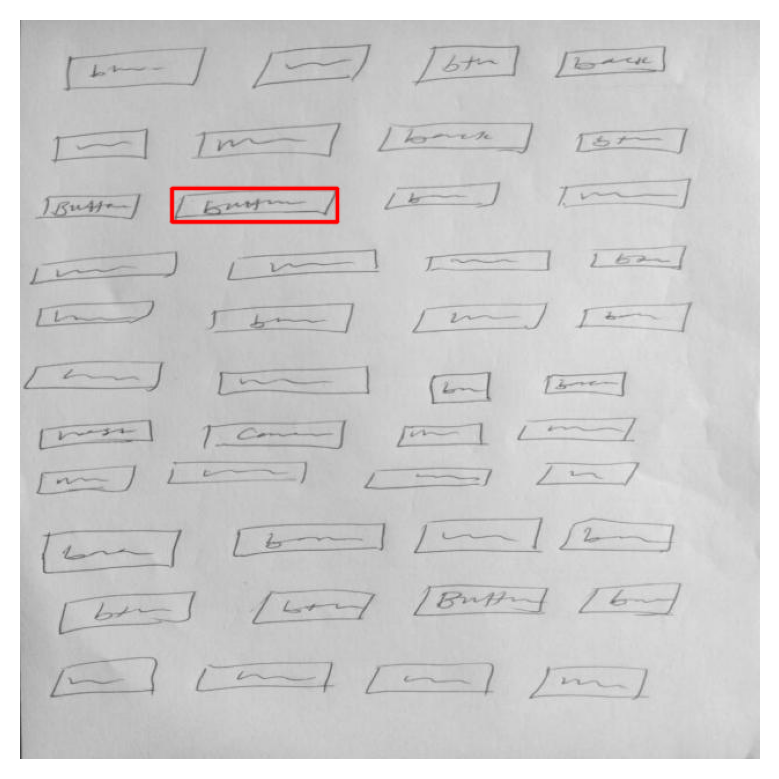

In [15]:
show_detected_objects( train[train['image_name']=='image_42_png.rf.994a1252265bd7383598547c034e8f4e.jpg'].iloc[1],img_folder='train/')

In [16]:
train.loc[train['image_name']=='image_42_png.rf.994a1252265bd7383598547c034e8f4e.jpg']

image_name  width  height  \
2346  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2347  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2348  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2349  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2350  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2351  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2352  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2353  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2354  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2355  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2356  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2357  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2358  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2359  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2360  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2361  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2362  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2363  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2364  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2365  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2366  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2367  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2368  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   

       class_name  x_min  y_min  x_max  y_max  
2346  RadioButton     36     22    164     64  
2347  RadioButton    131    146    274    175  
2348  RadioButton     13    149    107    174  
2349  RadioButton    338     20    434     57  
2350  RadioButton    308     88    446    117  
2351  RadioButton    314    139    416    166  
2352  RadioButton    461     22    559     51  
2353  RadioButton    463    136    583    165  
2354  RadioButton    491    194    578    218  
2355  RadioButton    147    555    273    581  
2356  RadioButton     27    490    157    535  
2357  RadioButton    196    490    306    526  
2358  RadioButton    335    486    459    520  
2359  RadioButton    481    485    576    518  
2360  RadioButton     13    441    143    481  
2361  RadioButton    176    433    318    469  
2362  RadioButton    460    429    569    462  
2363  RadioButton     12    343    118    374  
2364  RadioButton    158    244    291    273  
2365  RadioButton    481    244    582    272  
2366  RadioButton    352    302    416    332  
2367  RadioButton    451    303    529    329  
2368  RadioButton    155    345    283    374

In [17]:

train.loc[train['image_name']=='image_42_png.rf.994a1252265bd7383598547c034e8f4e.jpg','class_name']='Button'

In [18]:
train.loc[train['image_name']=='image_42_png.rf.994a1252265bd7383598547c034e8f4e.jpg']

image_name  width  height  \
2346  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2347  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2348  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2349  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2350  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2351  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2352  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2353  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2354  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2355  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2356  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2357  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2358  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2359  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2360  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2361  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2362  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2363  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2364  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2365  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2366  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2367  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   
2368  image_42_png.rf.994a1252265bd7383598547c034e8f...    640     640   

     class_name  x_min  y_min  x_max  y_max  
2346     Button     36     22    164     64  
2347     Button    131    146    274    175  
2348     Button     13    149    107    174  
2349     Button    338     20    434     57  
2350     Button    308     88    446    117  
2351     Button    314    139    416    166  
2352     Button    461     22    559     51  
2353     Button    463    136    583    165  
2354     Button    491    194    578    218  
2355     Button    147    555    273    581  
2356     Button     27    490    157    535  
2357     Button    196    490    306    526  
2358     Button    335    486    459    520  
2359     Button    481    485    576    518  
2360     Button     13    441    143    481  
2361     Button    176    433    318    469  
2362     Button    460    429    569    462  
2363     Button     12    343    118    374  
2364     Button    158    244    291    273  
2365     Button    481    244    582    272  
2366     Button    352    302    416    332  
2367     Button    451    303    529    329  
2368     Button    155    345    283    374

In [19]:
# elements counts
train['class_name'].value_counts()

TextBox        515
Button         447
Image          408
Link           384
Select         272
CheckBox       265
Label          261
Heading        258
Paragraph      231
RadioButton    208
Table          195
Carousel       169
Pagination     150
Textarea       120
Name: class_name, dtype: int64

In [20]:
# elements counts
val['class_name'].value_counts()

CheckBox       157
RadioButton     73
Select          65
Link            64
Label           58
Textarea        31
Image           21
Heading         20
Table           19
Paragraph       16
Button           9
TextBox          8
Name: class_name, dtype: int64

In [21]:
# elements counts
test['class_name'].value_counts()

CheckBox    70
Button      32
TextBox     25
Select      14
Carousel     9
Image        8
Name: class_name, dtype: int64

In [22]:
train.head(9)

image_name  width  height  \
0  00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg    640     640   
1  00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg    640     640   
2  00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg    640     640   
3  00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg    640     640   
4  00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg    640     640   
5  00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg    640     640   
6  00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg    640     640   
7  00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg    640     640   
8  00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg    640     640   

  class_name  x_min  y_min  x_max  y_max  
0     Select     95     98    345    157  
1     Select    102    244    342    309  
2     Button    106    542    372    614  
3      Image     12    160    139    400  
4      Image    191    151    306    395  
5      Image    370    150    493    393  
6    TextBox    389     15    532     85  
7     Button    536     13    640     91  
8  Paragraph    186    455    298    526

# Get final classes

In [23]:
df_label['accepted']= [ 'yes' for i in range(len(df_label))]

df_label.loc[df_label['class_label']=='Carousel','accepted']='no'
df_label.loc[df_label['class_label']=='Pagination','accepted']='no'
df_label.loc[df_label['class_label']=='Textarea','accepted']='no'
df_label.loc[df_label['class_label']=='ComboBox','accepted']='no'
df_label.loc[df_label['class_label']=='Table','accepted']='no'



In [24]:
df_label['existed in']= [ 'Sketch2code Image Dataset roboflow' for i in range(len(df_label))]

df_label.loc[df_label['class_label']=='ComboBox','existed in']='sketch it dataset'

df_label.loc[df_label['class_label']=='CheckBox','existed in']='both'
df_label.loc[df_label['class_label']=='Button','existed in']='both'
df_label.loc[df_label['class_label']=='Heading','existed in']='both'
df_label.loc[df_label['class_label']=='Paragraph','existed in']='both'
df_label.loc[df_label['class_label']=='RadioButton','existed in']='both'
df_label.loc[df_label['class_label']=='TextBox','existed in']='both'
df_label.loc[df_label['class_label']=='Image','existed in']='both'
df_label.loc[df_label['class_label']=='Link','existed in']='both'
df_label.loc[df_label['class_label']=='Label','existed in']='both'




In [26]:
df_label

class_label accepted                          existed in
index                                                          
1           Button      yes                                both
2         Carousel       no  Sketch2code Image Dataset roboflow
3         CheckBox      yes                                both
4          Heading      yes                                both
5            Image      yes                                both
6            Label      yes                                both
7             Link      yes                                both
8       Pagination       no  Sketch2code Image Dataset roboflow
9        Paragraph      yes                                both
10     RadioButton      yes                                both
11          Select      yes  Sketch2code Image Dataset roboflow
12           Table       no  Sketch2code Image Dataset roboflow
13         TextBox      yes                                both
14        Textarea       no  Sketch2code Image Dataset roboflow
15        ComboBox       no                   sketch it dataset

In [30]:
df_label_accpted=df_label[df_label['accepted']=='yes']
print(len(df_label_accpted))
df_label_accpted=pd.DataFrame(df_label_accpted['class_label']).set_index('class_label')
df_label_accpted.to_csv('../accpted_classes.csv')
df_label_accpted

10


Empty DataFrame
Columns: []
Index: [Button, CheckBox, Heading, Image, Label, Link, Paragraph, RadioButton, Select, TextBox]

# view train by element

In [ ]:
element= 'Carousel'

for i in range(len(train[train['class_name']==element])):
    for_print = train[train['class_name']==element].iloc[i]
    print(i,'from',len(train[train['class_name']==element]),for_print.class_name,for_print.image_name)
    show_detected_objects(for_print,img_folder='train/')

# view val by element

In [ ]:
element= 'CheckBox'

for i in range(len(val[val['class_name']==element])):
    for_print = val[val['class_name']==element].iloc[i]
    print(i,'from',len(val[val['class_name']==element]),for_print.class_name,for_print.image_name)
    show_detected_objects(for_print,img_folder='valid/')

# generate train + val & save it

In [ ]:
new_train = train.append(val,ignore_index=True)
new_train = new_train.append(test,ignore_index=True)
new_train

In [ ]:
len(train)+len(val)+len(test)

In [ ]:
import shutil

destination='./new_train'

for i in new_train.image_name: 
#     print(i)
    trainImgPath = './train/'+i
    valImgPath = './valid/'+i
    testImgPath = './test/'+i
    
    
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    
    
    if os.path.exists(trainImgPath):
#         print(trainImgPath)
        shutil.copy2(trainImgPath,destination)

    if os.path.exists(valImgPath):
#         print(valImgPath)
        shutil.copy2(valImgPath,destination)
    
    if os.path.exists(testImgPath):
#         print(testImgPath)
        shutil.copy2(testImgPath,destination)
        
        
new_train.to_csv(destination+'/annotations.csv',index=False)      

'done'

In [ ]:
pd.read_csv('new_train/annotations.csv',)